In [1]:
! pwd

/home/usman/Desktop/unomic/progressCodesMRI


In [3]:
! curl -o someones_epi.nii.gz https://nipy.org/nibabel/_downloads/f76cc5a46e5368e2c779868abc49e497/someones_epi.nii.gz
! curl -o someones_anatomy.nii.gz https://nipy.org/nibabel/_downloads/c16214e490de2a223655d30f4ba78f15/someones_anatomy.nii.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 93766  100 93766    0     0   252k      0 --:--:-- --:--:-- --:--:--  252k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  186k  100  186k    0     0   448k      0 --:--:-- --:--:-- --:--:--  448k


In [5]:
import nibabel as nib
epi_img = nib.load('someones_epi.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(53, 61, 33)

Text(0.5, 0.98, 'Center slices for EPI image')

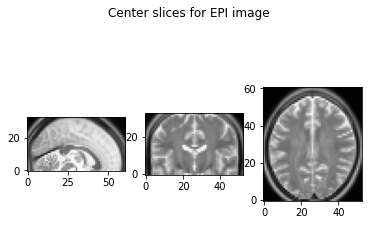

In [7]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_img_data[26, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

Text(0.5, 0.98, 'Center slices for anatomical image')

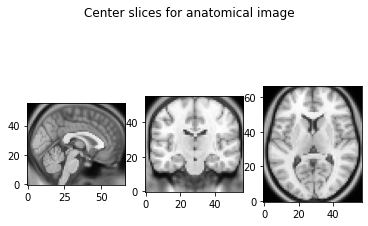

In [9]:
anat_img = nib.load('someones_anatomy.nii.gz')
anat_img_data = anat_img.get_fdata()
anat_img_data.shape
show_slices([anat_img_data[28, :, :],
             anat_img_data[:, 33, :],
             anat_img_data[:, :, 28]])
plt.suptitle("Center slices for anatomical image")  

In [12]:
n_i, n_j, n_k = epi_img_data.shape
center_i = (n_i - 1) // 2  # // for integer division
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2

center_i, center_j, center_k

(26, 30, 16)

In [13]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
# Print the affine
epi_img.affine

array([[  3.   ,   0.   ,   0.   , -78.   ],
       [  0.   ,   2.866,  -0.887, -76.   ],
       [  0.   ,   0.887,   2.866, -64.   ],
       [  0.   ,   0.   ,   0.   ,   1.   ]])